In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# for Box-Cox Transformation
from scipy import stats
# for spilt dataset
from sklearn.cross_validation import train_test_split
# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

In [3]:
plt.style.use('ggplot')

In [3]:
df= pd.read_csv('data.csv')

In [159]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,09/10/2015,1000.0,11/08/2015 12:12,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,01/11/2017,30000.0,02/09/2017 04:43,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,26/02/2013,45000.0,12/01/2013 00:20,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,16/04/2012,5000.0,17/03/2012 03:24,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,29/08/2015,19500.0,04/07/2015 08:35,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [160]:
df.shape

(374864, 15)

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374864 entries, 0 to 374863
Data columns (total 15 columns):
ID                  374864 non-null int64
name                374860 non-null object
category            374864 non-null object
main_category       374864 non-null object
currency            374864 non-null object
deadline            374864 non-null object
goal                374864 non-null float64
launched            374864 non-null object
pledged             374864 non-null float64
state               374864 non-null object
backers             374864 non-null int64
country             374864 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    374864 non-null float64
usd_goal_real       374864 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 42.9+ MB


In [162]:
df.nunique()

ID                  374864
name                372026
category               159
main_category           15
currency                14
deadline              3164
goal                  8312
launched            343934
pledged              61936
state                    5
backers               3963
country                 22
usd pledged          95455
usd_pledged_real    105383
usd_goal_real        50032
dtype: int64

In [163]:
df.isnull().sum()

ID                  0
name                4
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [164]:
df['category'] = df['category'].astype('category')
df['main_category'] = df['main_category'].astype('category')
df['currency'] = df['currency'].astype('category')
df['deadline'] = pd.to_datetime(df['deadline'], errors='coerce')
df['launched'] = pd.to_datetime(df['launched'], errors='coerce')
df['state'] = df['state'].astype('category')
df['country'] = df['country'].astype('category')

In [165]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.748640e+05,3.748640e+05,3.748640e+05,374864.000000,3.748640e+05,3.748640e+05,3.748640e+05
mean,1.074651e+09,4.952310e+04,9.750436e+03,106.687276,7.036729e+03,9.120803e+03,4.586318e+04
std,6.191357e+08,1.189355e+06,9.601043e+04,911.705321,7.863975e+04,9.131921e+04,1.158761e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.380708e+08,2.000000e+03,3.100000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075277e+09,5.500000e+03,6.200000e+02,12.000000,3.947200e+02,6.244100e+02,5.500000e+03
75%,1.610137e+09,1.650000e+04,4.080000e+03,57.000000,3.034090e+03,4.050815e+03,1.600000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [17]:
labels = []
values = []
datadict = df['main_category'].value_counts().to_dict() 
for item in datadict.items():
    labels.append(item[0])
    values.append(item[1])
labels

['Film & Video',
 'Music',
 'Publishing',
 'Games',
 'Technology',
 'Design',
 'Art',
 'Food',
 'Fashion',
 'Theater',
 'Comics',
 'Photography',
 'Crafts',
 'Journalism',
 'Dance']

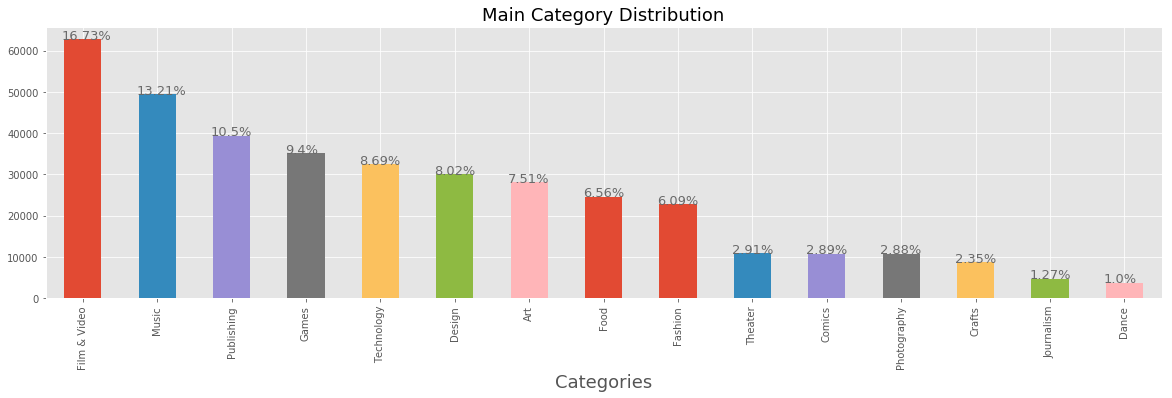

In [166]:
ax = df['main_category'].value_counts().plot.bar(figsize=(20,5), grid=True)
ax.set_alpha(0.8)
ax.set_title("Main Category Distribution", fontsize=18)
ax.set_xlabel("Categories", fontsize=18);

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()-.03, i.get_height()+.5, str(round((i.get_height()/total)*100, 2))+'%', fontsize=13,color='dimgrey')

In [167]:
df['main_category'].value_counts()

Film & Video    62697
Music           49530
Publishing      39379
Games           35226
Technology      32562
Design          30067
Art             28153
Food            24599
Fashion         22812
Theater         10912
Comics          10819
Photography     10778
Crafts           8809
Journalism       4754
Dance            3767
Name: main_category, dtype: int64

In [168]:
(df.main_category).groupby(df.launched.dt.year).count()

launched
1970        7
2009     1329
2010    10519
2011    26237
2012    41163
2013    44836
2014    66993
2015    74919
2016    56537
2017    52200
2018      124
Name: main_category, dtype: int64

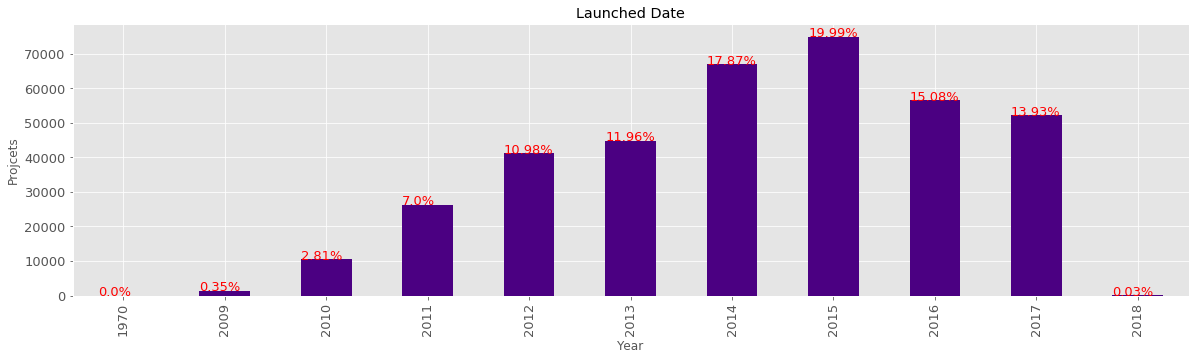

In [169]:
ax = (df.main_category).groupby(df.launched.dt.year).count().plot(kind="bar",figsize=(20,5), color="indigo", fontsize=13)
ax.set_alpha(0.8)
ax.set_title('Launched Date')
ax.set_ylabel('Projcets')
ax.set_xlabel('Year')

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x(), i.get_height(), str(round((i.get_height()/total)*100, 2))+'%', fontsize=13, color='red')

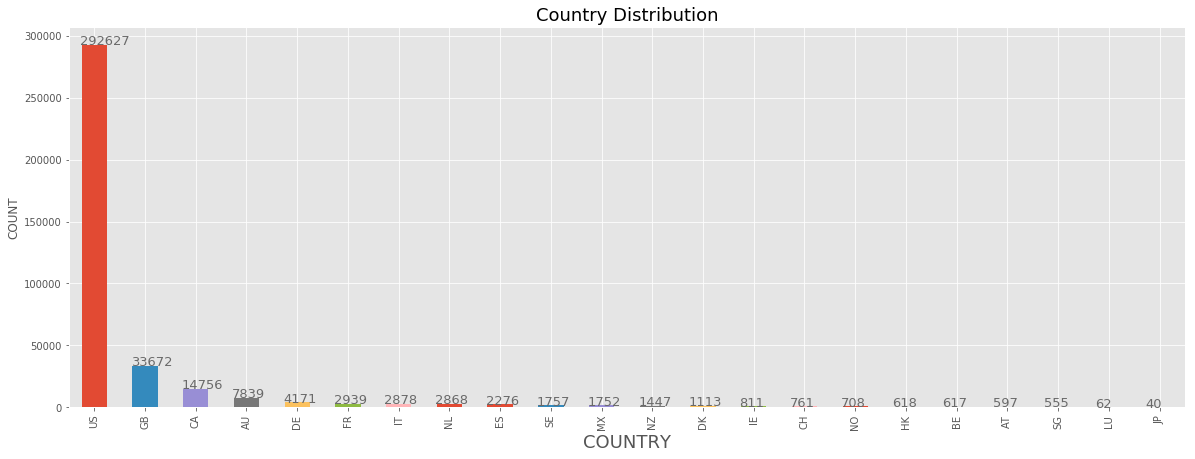

In [170]:
ax= df['country'].value_counts().plot.bar(figsize=(20,7),grid=True)
ax.set_alpha(0.8)
ax.set_title("Country Distribution", fontsize=18)
ax.set_xlabel("COUNTRY", fontsize=18);
ax.set_ylabel("COUNT")
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()-.03, i.get_height()+.5, str(i.get_height() ), fontsize=13,color='dimgrey')

In [171]:
df.country.dtype

CategoricalDtype(categories=['AT', 'AU', 'BE', 'CA', 'CH', 'DE', 'DK', 'ES', 'FR', 'GB',
                  'HK', 'IE', 'IT', 'JP', 'LU', 'MX', 'NL', 'NO', 'NZ', 'SE',
                  'SG', 'US'],
                 ordered=False)

In [211]:
country_pre = round(df["country"].value_counts() / len(df["country"]) * 100,2)

In [218]:
country = list(zip(country_pre.index, country_pre))
row_template = "{:^8} | {:<15} "
def prettyprint(list_of_tuples):
    print()
    print(row_template.format("country", "Percentage"))
    print("-"*24)
    for coun, per in country:
        print(row_template.format(coun, '% ' + str(per)))
prettyprint(country)


country  | Percentage      
------------------------
   US    | % 78.06         
   GB    | % 8.98          
   CA    | % 3.94          
   AU    | % 2.09          
   DE    | % 1.11          
   FR    | % 0.78          
   IT    | % 0.77          
   NL    | % 0.77          
   ES    | % 0.61          
   SE    | % 0.47          
   MX    | % 0.47          
   NZ    | % 0.39          
   DK    | % 0.3           
   IE    | % 0.22          
   CH    | % 0.2           
   NO    | % 0.19          
   HK    | % 0.16          
   BE    | % 0.16          
   AT    | % 0.16          
   SG    | % 0.15          
   LU    | % 0.02          
   JP    | % 0.01          


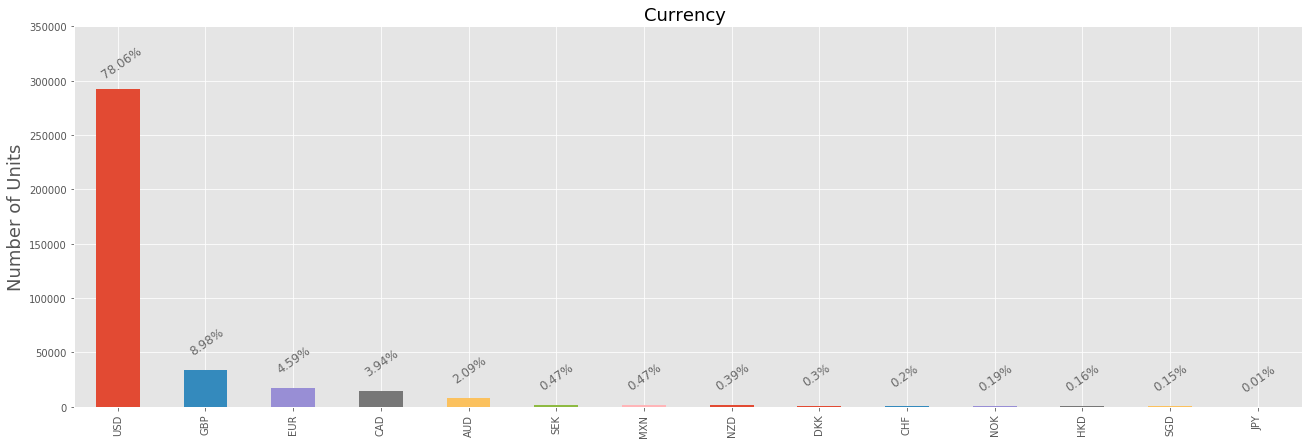

In [173]:
ax = df.currency.value_counts().plot.bar(figsize=(22,7))
ax.set_alpha(0.8)
ax.set_title("Currency ", fontsize=18)
ax.set_ylabel("Number of Units", fontsize=18);
ax.set_yticks([0, 50000, 100000, 150000, 200000, 250000, 300000, 350000])
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.04, i.get_height()+32000, str(round((i.get_height()/total)*100, 2))+'%', fontsize=12, color='dimgrey', rotation=35)

In [174]:
currency_pre = round(df["currency"].value_counts() / len(df["currency"]) * 100,2)

In [176]:
currency = list(zip(currency_pre.index, currency_pre))
row_template = "{:^8} | {:^25} "
def prettyprint(list_of_tuples):
    print()
    print(row_template.format("Currency", "Percentage"))
    print("-"*28)
    for curr, per in currency:
        print(row_template.format(curr, '% ' + str(per)))
prettyprint(currency)

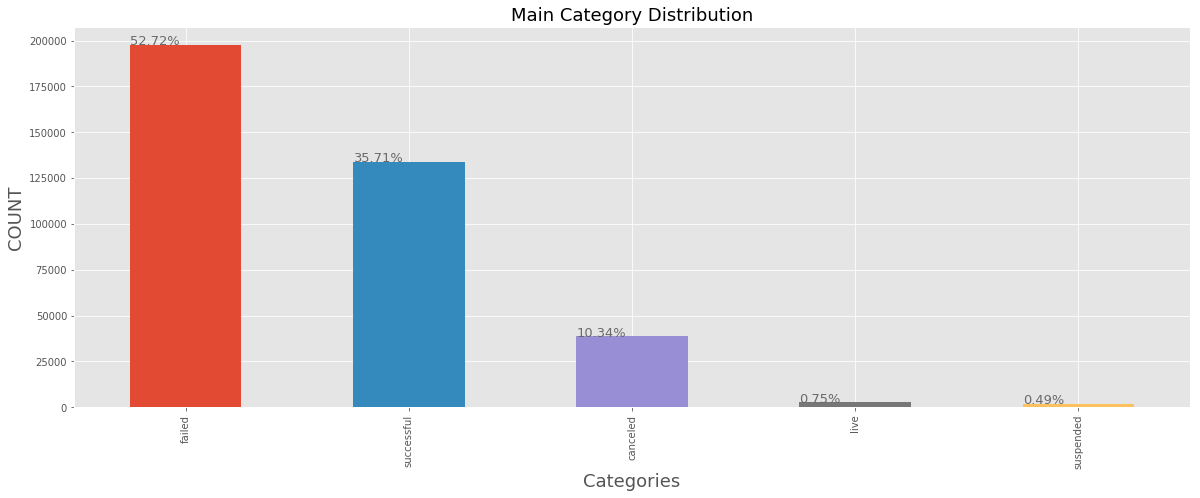

In [204]:
ax=df.state.value_counts().plot.bar(figsize=(20,7),grid=True)
ax.set_alpha(0.8)
ax.set_title("Main Category Distribution", fontsize=18)
ax.set_xlabel("Categories", fontsize=18);
ax.set_ylabel("COUNT",fontsize=18 )
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()-.00002, i.get_height()+.5, str(round((i.get_height()/total)*100, 2))+'%', fontsize=13,color='dimgrey')

In [207]:
state_pre= round(df.state.value_counts() /len(df.state)*100 , 2)

In [208]:
state = list(zip(state_pre.index, state_pre))
row_template = "{:<10} | {:<25} "
def prettyprint(list_of_tuples):
    print()
    print(row_template.format("State", "Presentage for All Project is"))
    print("-"*45)
    for sta, per in state:
        print(row_template.format(sta, '% ' + str(per)))
prettyprint(state)


State      | Presentage for All Project is 
---------------------------------------------
failed     | % 52.72                   
successful | % 35.71                   
canceled   | % 10.34                   
live       | % 0.75                    
suspended  | % 0.49                    


In [209]:
print("Descriptive status count by year")
print("-"*60)
print(pd.crosstab(df.launched.dt.year, df.state))

Descriptive status count by year
------------------------------------------------------------
state     canceled  failed  live  successful  suspended
launched                                               
1970             6       0     0           0          1
2009           150     600     0         579          0
2010           926    4984     0        4593         16
2011          2144   11878     0       12171         44
2012          2631   20588     0       17892         52
2013          3690   21686     0       19402         58
2014          7418   38199     0       21106        270
2015          8926   44301     0       20971        721
2016          7098   30421     1       18675        342
2017          5766   24957  2675       18462        340
2018             2       0   122           0          0


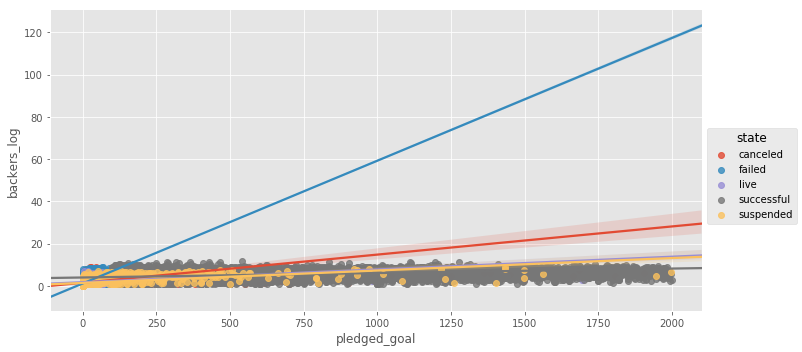

In [210]:
df['backers_log'] = np.log(df['backers'] + 1 )
df['pledged_goal'] = round((df['usd_pledged_real'] /df['usd_goal_real']) * 100, 2)
df['pledged_goal'] = df['pledged_goal'].astype(float)
sns.lmplot(x='pledged_goal', y ='backers_log',data=df[df['pledged_goal'] < 2000], size = 5, aspect = 2,hue='state')
plt.show()

<function matplotlib.pyplot.tight_layout>

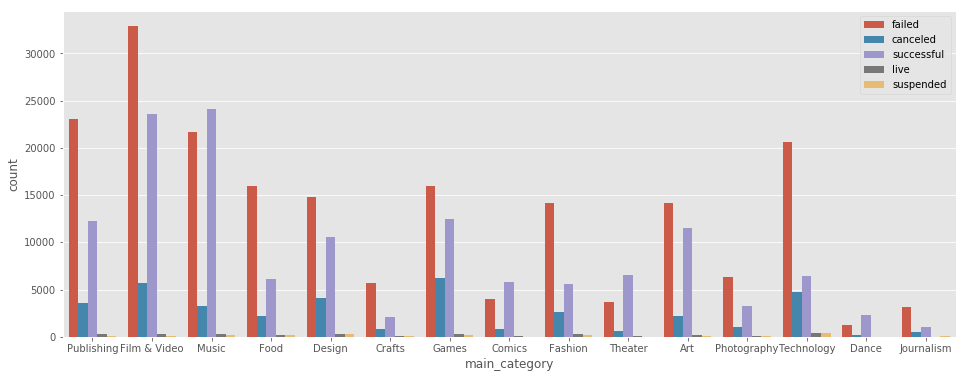

In [230]:
plt.figure(figsize=(16,6))
sns.countplot(x='main_category', data=df, hue='state')
plt.legend(loc='upper right')
plt.tight_layout


In [27]:
# failed = 0, successful = 1

df['state'] = df['state'].map({'failed': 0,'successful': 1})

In [29]:
technology = (df.main_category.str.contains('Technology')) & ( df.state == 0)

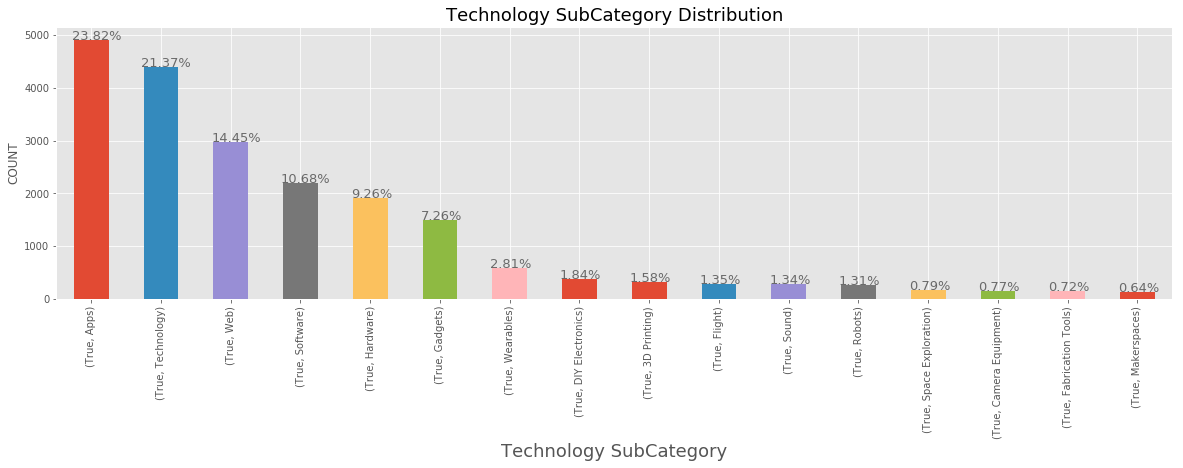

In [104]:
ax=df[technology].category.groupby(technology).value_counts().plot(kind='bar',figsize=(20,5), grid=True)
ax.set_alpha(0.8)
ax.set_title("Technology SubCategory Failled Project Distribution", fontsize=18)
ax.set_xlabel("Technology SubCategory", fontsize=18);
ax.set_ylabel("COUNT")
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()-.03, i.get_height()+.5, str(round((i.get_height()/total)*100, 2))+'%', fontsize=13,color='dimgrey')

In [31]:
technology2 = (df.main_category.str.contains('Technology')) & ( df.state == 1)

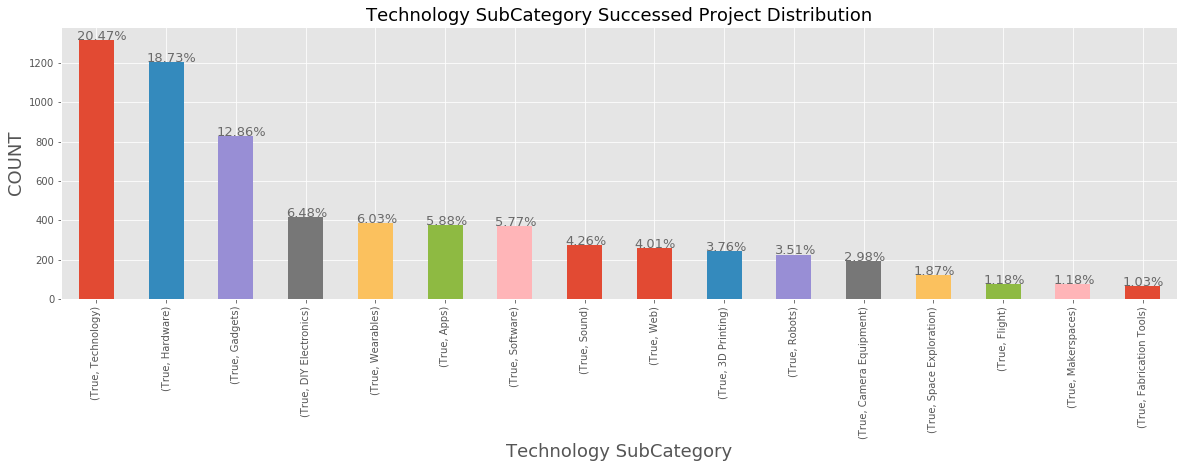

In [108]:
ax=df[technology2].category.groupby(technology2).value_counts().plot(kind='bar',figsize=(20,5),grid=True)
ax.set_alpha(0.8)
ax.set_title("Technology SubCategory Successed Project Distribution", fontsize=18)
ax.set_xlabel("Technology SubCategory", fontsize=18);
ax.set_ylabel("COUNT" , fontsize=18)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()-.03, i.get_height()+.5, str(round((i.get_height()/total)*100, 2))+'%', fontsize=13,color='dimgrey')

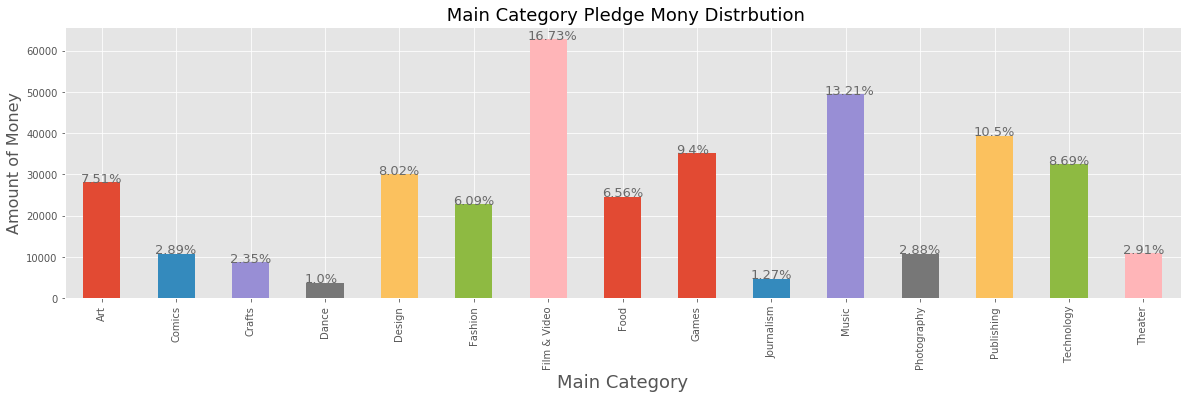

In [110]:
ax= df.pledged.groupby(df.main_category).count().plot(kind='bar', figsize=(20,5), grid=True)
ax.set_alpha(0.8)
ax.set_title(" Main Category Pledge Distrbution", fontsize=18)
ax.set_xlabel("Main Category", fontsize=18);
ax.set_ylabel("Amount of Money", fontsize=16)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()-.03, i.get_height()+.5, str(round((i.get_height()/total)*100, 2))+'%', fontsize=13,color='dimgrey')

In [34]:
tech = df[df.main_category.str.contains('Technology')].category.unique().tolist()

In [35]:
cat_ple = df.groupby('category', as_index=False)[['pledged']].agg('sum')

In [36]:
cat = cat_ple[cat_ple.category.isin(tech)].copy()

In [37]:
cat['plee'] =  stats.boxcox(cat.pledged)[0]

In [116]:
cat.plot(x='category', y='plee', kind='bar', figsize=(20,5), grid=True)

KeyError: 'category'

In [39]:
cat.set_index(keys='category', drop=True, inplace=True)

In [231]:
pledged_pre = round((cat['pledged'])/(cat['pledged'].sum())*100 , 2)

In [232]:
pledg = list(zip(pledged_pre.index, pledged_pre))
row_template = "{:<22} | {:<18} "
def prettyprint(list_of_tuples):
    print()
    print(row_template.format("Technolgy Subcategory", "Presentage Money Raise is"))
    print("-"*51)
    for ple, per in pledg:
        print(row_template.format(ple, '% ' + str(per)))
prettyprint(pledg)


Technolgy Subcategory  | Presentage Money Raise is 
---------------------------------------------------
3D Printing            | % 6.6              
Apps                   | % 1.6              
Camera Equipment       | % 4.78             
DIY Electronics        | % 3.23             
Fabrication Tools      | % 1.62             
Flight                 | % 1.64             
Gadgets                | % 13.4             
Hardware               | % 22.05            
Makerspaces            | % 0.24             
Robots                 | % 2.82             
Software               | % 1.67             
Sound                  | % 6.11             
Space Exploration      | % 1.29             
Technology             | % 20.48            
Wearables              | % 10.46            
Web                    | % 2.02             


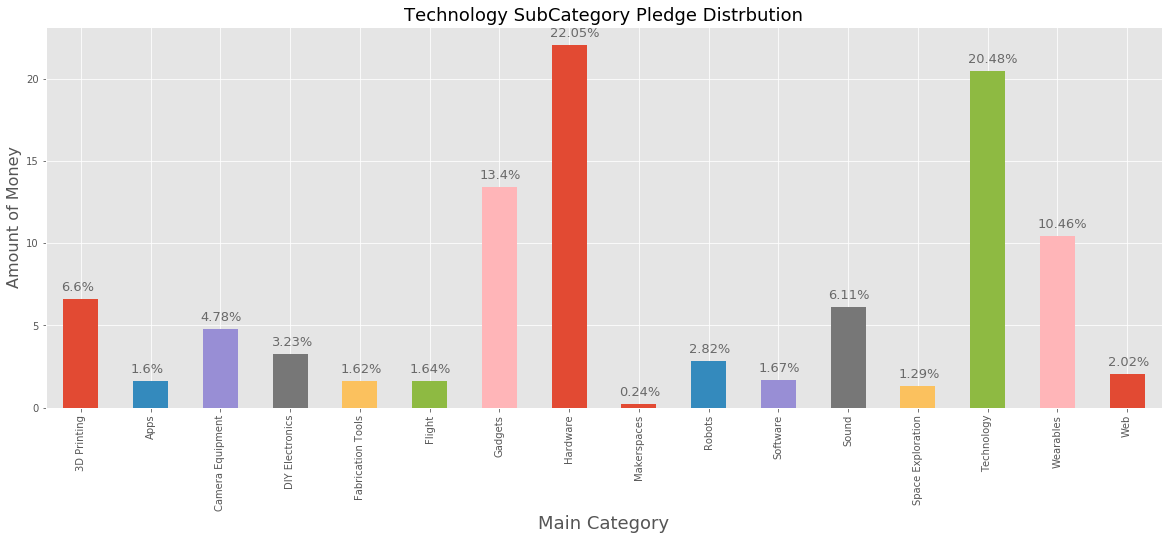

In [118]:
ax=pledged_pre.plot(kind='bar', figsize=(20,7),grid=True)
ax.set_alpha(0.8)
ax.set_title("Technology SubCategory Pledge Distrbution", fontsize=18)
ax.set_xlabel("Main Category", fontsize=18);
ax.set_ylabel("Amount of Money", fontsize=16)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()-.03, i.get_height()+.5, str(round((i.get_height()/total)*100, 2))+'%', fontsize=13,color='dimgrey')

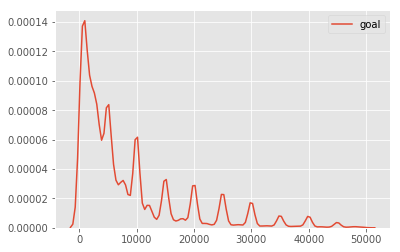

In [44]:
sns.kdeplot(df[(df['goal'] < 50000)]['goal'])

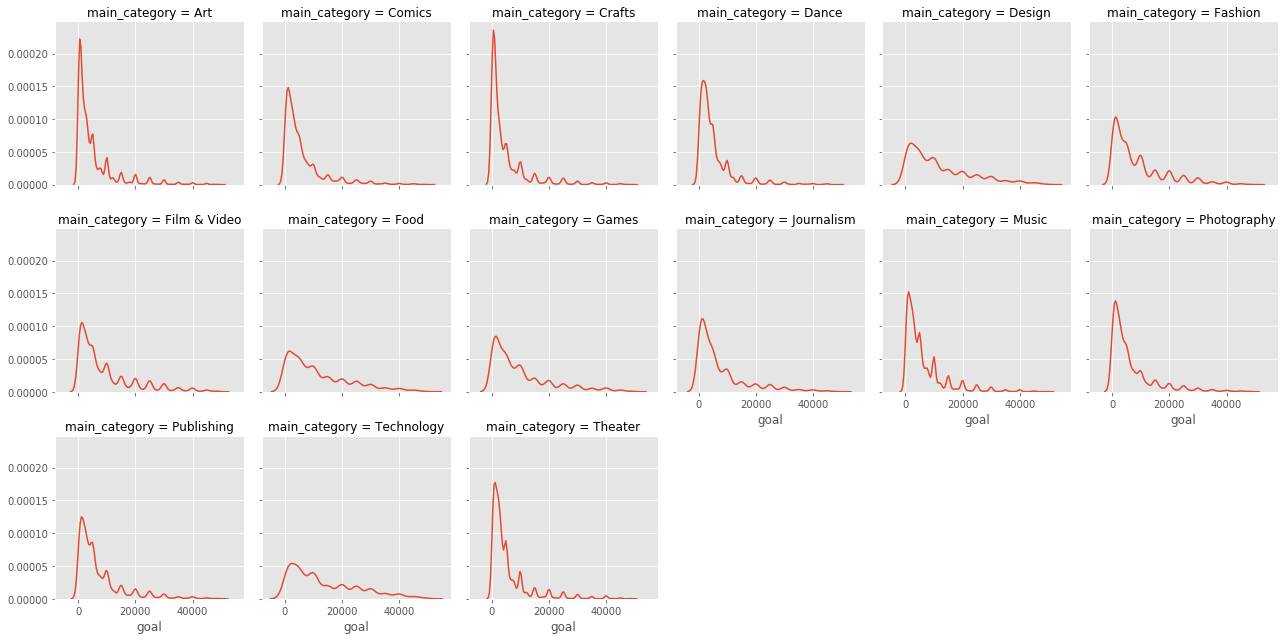

In [45]:
g = sns.FacetGrid(df[(df['goal'] < 50000)],col_wrap=6, col="main_category")
g.map(sns.kdeplot, "goal")

In [46]:
# Create new column
# 'duration_days' = 'deadline' - 'launched'

df['duration_days'] = df['deadline'].subtract(df['launched'])
df['duration_days'] = df['duration_days'].astype('timedelta64[D]')


In [47]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,backers_log,pledged_goal,duration_days
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-09-10,1000.0,2015-11-08 12:12:00,0.0,0.0,0,GB,0.0,0.0,1533.95,0.000000,0.00,-60.0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-01-11,30000.0,2017-02-09 04:43:00,2421.0,0.0,15,US,100.0,2421.0,30000.00,2.772589,8.07,-30.0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-12-01 00:20:00,220.0,0.0,3,US,220.0,220.0,45000.00,1.386294,0.49,-279.0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:00,1.0,0.0,1,US,1.0,1.0,5000.00,0.693147,0.02,29.0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-04-07 08:35:00,1283.0,NaN,14,US,1283.0,1283.0,19500.00,2.708050,6.58,143.0


In [48]:
df.succes= df[(df['state'] == 1)].copy()
df.faild= df[(df['state'] == 0)].copy()
print(df.succes.shape)
print(df.faild.shape)

(133851, 18)
(197614, 18)


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


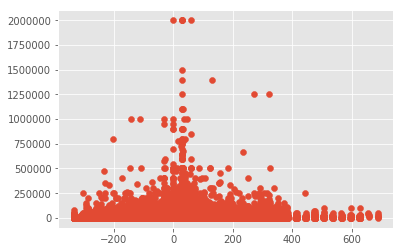

In [122]:
plt.scatter(x= df.succes.duration_days, y= df.succes.goal)

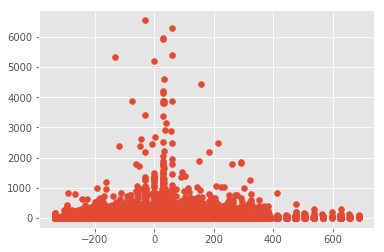

In [50]:
plt.scatter(df.faild.duration_days,df.faild.backers)

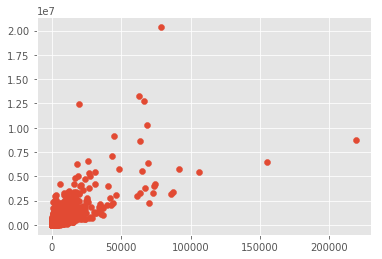

In [51]:
plt.scatter(df.backers, df.usd_pledged_real)

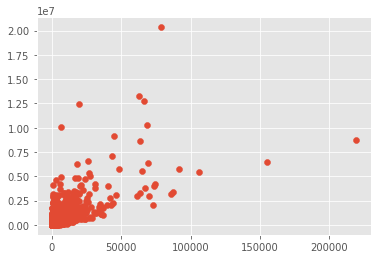

In [52]:
plt.scatter(df.backers, df.pledged)

In [53]:
np.random.exponential(size=1000)
usd_goal= df.usd_goal_real
usd_goal_scale_data= minmax_scaling(usd_goal, columns=[0])

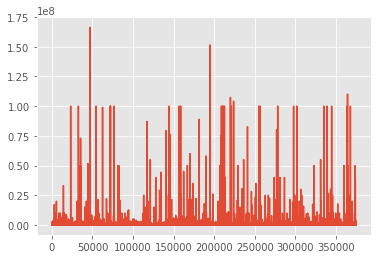

In [54]:
plt.plot(df.usd_goal_real)

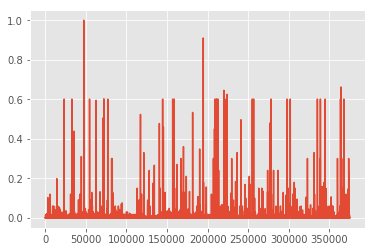

In [55]:
plt.plot(usd_goal_scale_data)

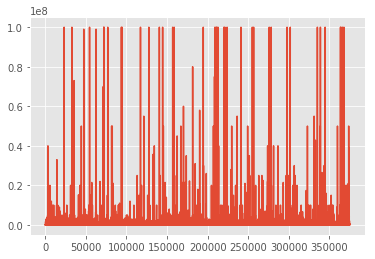

In [56]:
new_goal = df.goal
goal_scale_data= minmax_scaling(new_goal, columns=[0])
plt.plot(df.goal)

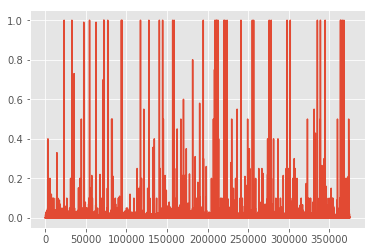

In [57]:
plt.plot(goal_scale_data)

In [58]:
positive_pledg= df.pledged.loc[df.pledged>0]
normalized_pledg= stats.boxcox(positive_pledg)[0]

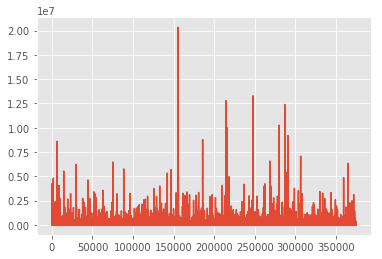

In [59]:
plt.plot(df.pledged)

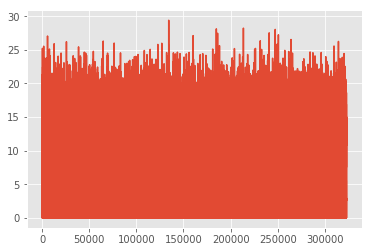

In [60]:
plt.plot(normalized_pledg)

In [61]:
positive_usd_pledg = df.usd_pledged_real.loc[df.usd_pledged_real>0]
normalized_usdpledge = stats.boxcox(positive_usd_pledg)[0]

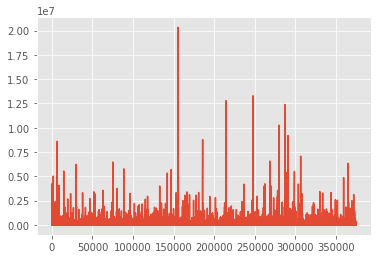

In [62]:
plt.plot(df.usd_pledged_real)

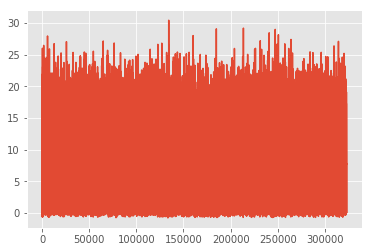

In [63]:
plt.plot(normalized_usdpledge)

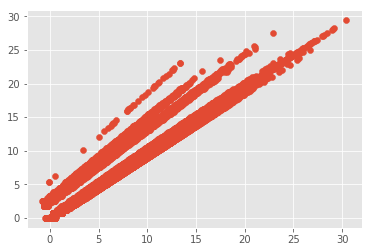

In [64]:
plt.scatter(normalized_usdpledge, normalized_pledg)

In [65]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,backers_log,pledged_goal,duration_days
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-09-10,1000.0,2015-11-08 12:12:00,0.0,0.0,0,GB,0.0,0.0,1533.95,0.000000,0.00,-60.0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-01-11,30000.0,2017-02-09 04:43:00,2421.0,0.0,15,US,100.0,2421.0,30000.00,2.772589,8.07,-30.0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-12-01 00:20:00,220.0,0.0,3,US,220.0,220.0,45000.00,1.386294,0.49,-279.0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:00,1.0,0.0,1,US,1.0,1.0,5000.00,0.693147,0.02,29.0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-04-07 08:35:00,1283.0,NaN,14,US,1283.0,1283.0,19500.00,2.708050,6.58,143.0


In [66]:
to_drop=['ID', 'name','currency','category','usd pledged','deadline','pledged','launched','goal', 'backers','usd_pledged_real', 'backers_log', 'pledged_goal']

In [67]:
new_df = df.drop(columns=to_drop, axis=1)

In [68]:
new_df.head()

,main_category,state,country,usd_goal_real,duration_days
0,Publishing,0.0,GB,1533.95,-60.0
1,Film & Video,0.0,US,30000.00,-30.0
2,Film & Video,0.0,US,45000.00,-279.0
3,Music,0.0,US,5000.00,29.0
4,Film & Video,NaN,US,19500.00,143.0


In [69]:
new_df.dtypes

main_category    category
state             float64
country          category
usd_goal_real     float64
duration_days     float64
dtype: object

In [70]:
new_df.shape

(374864, 5)

In [71]:
new_df.dropna(how='any', axis=0, inplace=True)

In [72]:
new_df.shape

(331465, 5)

In [73]:
new_df.head()

,main_category,state,country,usd_goal_real,duration_days
0,Publishing,0.0,GB,1533.95,-60.0
1,Film & Video,0.0,US,30000.00,-30.0
2,Film & Video,0.0,US,45000.00,-279.0
3,Music,0.0,US,5000.00,29.0
5,Food,1.0,US,50000.00,-54.0


In [74]:
# We use one-hot-codding

new_df = pd.get_dummies(new_df, columns = ['main_category'])
new_df = pd.get_dummies(new_df, columns=['country'])


In [75]:
new_df.shape

(331465, 40)

In [76]:
y = new_df['state']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
5    1.0
Name: state, dtype: float64

In [77]:
new_df = new_df.drop('state', 1)

In [78]:
# Split dataframe into random train and test subsets

X_train, X_test, Y_train, Y_test = train_test_split(new_df, y, test_size = 0.1, random_state=42)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(298318, 39) (298318,)
(33147, 39) (33147,)


In [1]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

NameError: name 'X_train' is not defined

In [80]:
predictions = logreg.predict(X_test)

In [81]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test, predictions))


             precision    recall  f1-score   support

        0.0       0.61      0.95      0.74     19900
        1.0       0.55      0.09      0.15     13247

avg / total       0.59      0.61      0.51     33147



In [82]:
coeff_df = pd.DataFrame(new_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
12,main_category_Photography,5.756455e-06
16,country_AT,3.356652e-06
3,main_category_Crafts,2.281210e-06
10,main_category_Journalism,1.260986e-06
5,main_category_Design,1.212513e-06
6,main_category_Fashion,7.288634e-07
8,main_category_Food,3.510001e-07
27,country_IE,3.614998e-08
30,country_LU,-4.205784e-09
31,country_MX,-8.550255e-09


In [83]:
from_largest = np.argsort(logreg.coef_)[0][::-1]
positive_coef_inds = []
for index in from_largest:
    if logreg.coef_[0][index] > 0:
        positive_coef_inds.append(index)
    else:
        break
print(X_train.iloc[:, positive_coef_inds].columns)
print(X_train.iloc[:, np.argmin(logreg.coef_[0])].name)

Index(['main_category_Music', 'main_category_Theater', 'main_category_Comics',
       'main_category_Games', 'main_category_Dance', 'main_category_Design',
       'main_category_Film & Video', 'country_HK'],
      dtype='object')
duration_days


In [84]:
print(X_train.iloc[:, np.argmin(logreg.coef_[0])].name)

duration_days


In [85]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

71.77

In [86]:
# Linear SVC
from sklearn.svm import SVC, LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

61.65

In [87]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

83.49

In [88]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

83.49

In [89]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest',   
              'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_knn, acc_log, 
              acc_random_forest,   
              acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,83.49
4,Decision Tree,83.49
0,KNN,71.77
3,Linear SVC,61.65
1,Logistic Regression,60.18
